In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dfd = pd.read_csv('../datafiles/pca_mnist.csv')
df= dfd.head(15000)

In [3]:
labels = df.label.copy()
df.drop(labels='label',axis = 1,inplace=True)

C:\Users\magic\anaconda3\envs\playground\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [4]:
from sklearn.preprocessing import StandardScaler
std_data = StandardScaler().fit_transform(df)
print(std_data.shape,df.shape)

(15000, 784) (15000, 784)


In [5]:
cov_data = np.matmul(std_data.T,std_data)
cov_data.shape

(784, 784)

In [6]:
from scipy import linalg
e_val , e_vec = linalg.eigh(cov_data,eigvals=(782,783))
print(df.shape,e_vec.shape)

(15000, 784) (784, 2)


In [11]:
new_data= np.matmul(std_data,e_vec)
new_data.shape

(15000, 2)

In [12]:
ndf = pd.DataFrame(data = new_data,columns=['col1','col2'])
ndf['labels']=labels
ndf

,col1,col2,labels
0,-5.558661,-5.043558,1
1,6.193635,19.305278,0
2,-1.909878,-7.678775,1
3,5.525748,-0.464845,4
4,6.366527,26.644289,0
...,...,...,...
14995,3.139416,-4.758956,1
14996,1.946714,-1.314215,4
14997,-2.147937,-1.507269,8
14998,3.204122,-6.537313,9


In [22]:
ndf['labels'] = ndf['labels'].astype(str)
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col1    15000 non-null  float64
 1   col2    15000 non-null  float64
 2   labels  15000 non-null  object 
dtypes: float64(2), object(1)
memory usage: 351.7+ KB


In [25]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col1    15000 non-null  float64
 1   col2    15000 non-null  float64
 2   labels  15000 non-null  object 
dtypes: float64(2), object(1)
memory usage: 351.7+ KB


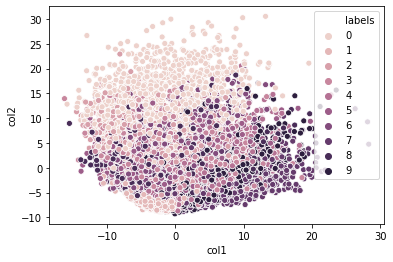

In [27]:
sns.scatterplot(x='col1',y='col2',hue='labels',data=ndf,legend="full")